In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
last_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

last_date = dt.datetime.strptime(last_str[0], '%Y-%m-%d')
query_date = dt.date(last_date.year -1, last_date.month, last_date.day)
query_date

prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()


#prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
#filter(Measurement.date <= "2017-08-23").all()

prcp_df = pd.DataFrame(prcp)

prcp_df["date"] = pd.to_datetime(prcp_df["date"])

prcp_df = prcp_df.set_index("date")

prcp_df = prcp_df.rename(columns = {"prcp": "percipitation"})

prcp_df.head()

,percipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


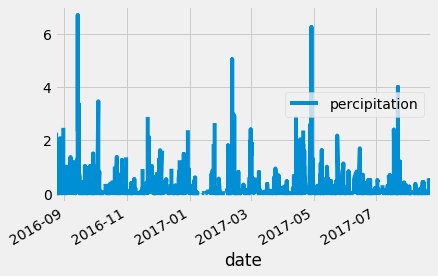

In [10]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?

station_count= session.query(Station.station).count()
station_count

9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
station_activity[0]

('USC00519281', 2772)

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_selection = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active = session.query(*station_selection).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
most_active

(54.0, 85.0, 71.66378066378067)

In [16]:
for row in reversed(station_activity):      
    most_active_station=row.station

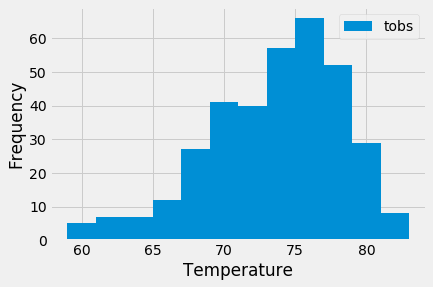

In [17]:
highest_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2016-08-24", Measurement.date <="2017-08-23").all()

temperatures= [temp[0] for temp in highest_tobs]


plt.hist(temperatures, bins=12, label='tobs')
#plt.title("Highest Temperature Observations for " + (most_active_name) + " Last Year")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend()